# Electricity and magnetizm practice tasks

### Task1: Напишите программу, позволяющую строить потенциал и напряженность электрического поля диполя, считая, что составляющие его электрические заряды одинаковы по величине и противоположны по знаку.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy import integrate
import math as m

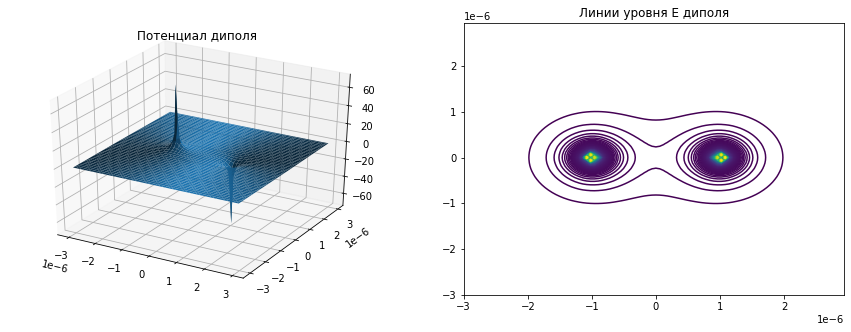

In [76]:
def phi(q, xq, yq, X, Y):
    e0 = 8.85e-12
    M = np.zeros((len(X), len(Y)))
    
    for i in range(len(X)):
        for j in range(len(Y)):
            s = 0
            for k in range(len(q)):
                s += q[k]/((X[i] - xq[k])**2+(Y[j] - yq[k])**2)**0.5
                
            M[i, j] = s/(4*e0*m.pi)
            
    return M


e=1.6e-16
R_0 = 1e-6
q = [e, -e]

xq = np.array([-R_0, R_0])
yq = np.zeros(2)

N1 = 100
x_min = y_min = -3*R_0
x_max = y_max = 3*R_0

x = np.array([x_min+(x_max-x_min)/N1*i for i in range(N1)])
y = np.array([y_min+(y_max-y_min)/N1*i for i in range(N1)])

P = phi(q, xq, yq, px, py)
x1, y1 = np.meshgrid(px, py)

ex, ey = np.gradient(-P, 0.1, 0.1)
E = (ex**2 + ey**2)**0.5

fig = plt.figure(figsize=[15, 5])
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_title('Потенциал диполя')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Линии уровня E диполя')

ax1.plot_surface(y1, x1, P, linewidth=0)
ax2.contour(y1, x1, E, 400)

plt.show()

### Task2: Напишите программу, позволяющую строить потенциал и напряженность электрического поля квадроуполя, то есть электрическую систему, состоящую из четырех равных по абсолютной величине электрических зарядов, расположенных в вершинах квадрата, считая, что электрические заряды, расположенные в соседних вершинах, имеют разный знак.


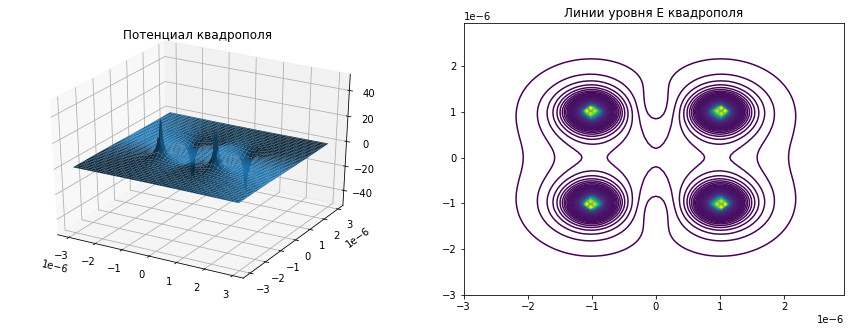

In [77]:
q = [e, -e, e, -e]

xq = np.array([-R_0, -R_0, R_0, R_0])
yq = np.array([-R_0, R_0, -R_0, R_0])


N1 = 100
x_min = y_min = -3*R_0
x_max = y_max = 3*R_0

x = np.array([x_min+(x_max-x_min)/N1*i for i in range(N1)])
y = np.array([y_min+(y_max-y_min)/N1*i for i in range(N1)])

P = phi(q, xq, yq, px, py)
x1, y1 = np.meshgrid(px, py)

ex, ey = np.gradient(-P, 0.01, 0.01)
E = (ex**2 + ey**2)**0.5

fig = plt.figure(figsize=[15, 5])
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_title('Потенциал квадрополя')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Линии уровня E квадрополя')

ax1.plot_surface(y1, x1, P, linewidth=0)
ax2.contour(y1, x1, E, 400)


plt.show()

### Task3: Как известно зависимость напряженность поля, создаваемого магнитным диполем $\vec{M}$, описывается формулой:

$$\vec{B}(\vec{R}) = \frac{3(\vec M \cdot \vec R){\vec{R}}}{|\vec R|^5} - \frac{\vec M}{|\vec R|^3}$$

#### - Исследуйте особенности магнитного поля, создаваемого магнитным диполем. Рассмотрите магнитные поля на различных расстояниях от диполя.
#### - Сравните магнитные поля, создаваемые кольцом с током и магнитным диполем. Какой вывод можно сделать?

In [92]:
def ring(y, z, a=1):
    Nstep = 100
    x = 0
    Ny = len(y)
    Nz = len(z)
    
    delta_phi = 2*m.pi / Nstep
    
    phi = [delta_phi * (n-1) for n in range(1, Nstep + 2)]
        
    By = np.zeros((Ny, Nz), dtype=np.float64)
    Bz = np.zeros((Ny, Nz), dtype=np.float64)
        
    for i in range(Ny):
        for j in range(Nz):
            s = np.array([0., 0., 0.])
            for n in range(Nstep+1):
                dL = np.array([-a*m.sin(phi[n]) * delta_phi, a*m.cos(phi[n])*delta_phi, 0])
                r = np.array([a*m.cos(phi[n]), a*m.sin(phi[n]), 0])
                R = np.array([x, y[i], z[j]])
                s = s + np.cross(dL, (R-r))/(np.dot((R-r), (R-r).T))**(3/2)
            
            By[i][j] = s[1]
            Bz[i][j] = s[2]
            
    return (By, Bz)

In [ ]:
def dipole(y, z, x):
    

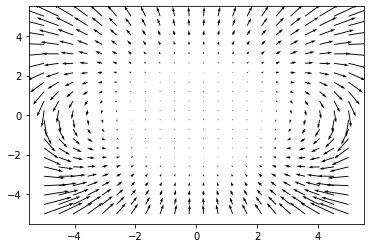

In [93]:
N1 = 21
y_min = z_min = -5
y_max = z_max = 5

y = np.array([y_min + (y_max - y_min)/N1 * (i-1) for i in range(1, N1+2)])
z = np.array([z_min + (z_max - z_min)/N1 * (i-1) for i in range(1, N1+2)])
    
By, Bz = ring(y, z)

mp = (By**2 + Bz**2)*0.5

by, bz = By / mp, Bz / mp

y1, z1 = np.meshgrid(y, z)

fig = plt.figure()
ax = fig.add_subplot(111)
quiv = ax.quiver(z1, y1, by, bz)